**Arbol de decisión**

In [1]:
#lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#load dataset
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

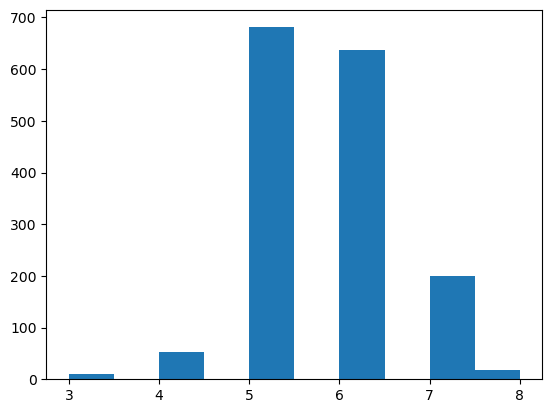

In [8]:
plt.hist(data.quality)

<Axes: xlabel='alcohol', ylabel='pH'>

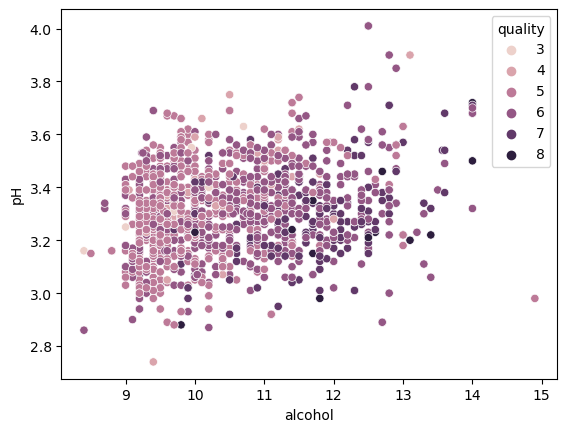

In [9]:
sns.scatterplot(x = "alcohol", y = "pH", hue = "quality", data = data)

In [11]:
predictors_col = ["density", "pH", "alcohol", "residual sugar"]
target_col = ["quality"]

In [12]:
predictors = data[predictors_col]
target = data[target_col]

In [13]:
predictors

,density,pH,alcohol,residual sugar
0,0.99780,3.51,9.4,1.9
1,0.99680,3.20,9.8,2.6
2,0.99700,3.26,9.8,2.3
3,0.99800,3.16,9.8,1.9
4,0.99780,3.51,9.4,1.9
...,...,...,...,...
1594,0.99490,3.45,10.5,2.0
1595,0.99512,3.52,11.2,2.2
1596,0.99574,3.42,11.0,2.3
1597,0.99547,3.57,10.2,2.0


In [14]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [15]:
corr = predictors.corr()
corr

,density,pH,alcohol,residual sugar
density,1.000000,-0.341699,-0.496180,0.355283
pH,-0.341699,1.000000,0.205633,-0.085652
alcohol,-0.496180,0.205633,1.000000,0.042075
residual sugar,0.355283,-0.085652,0.042075,1.000000


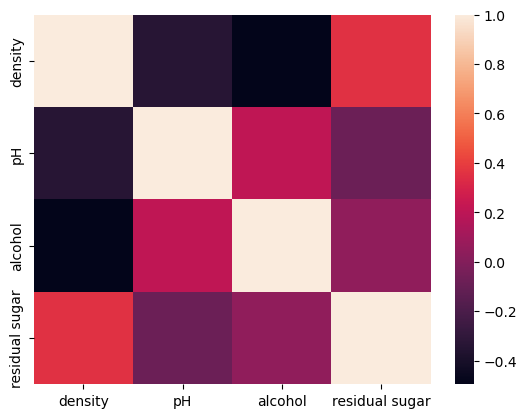

In [16]:
sns.heatmap(corr)
plt.show()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [114]:
tree = DecisionTreeClassifier()

In [115]:
arbol = tree.fit(X_train, y_train)

[Text(0.6048910574503774, 0.9791666666666666, 'x[2] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9, 45, 535, 514, 164, 12]'),
 Text(0.36118561294380763, 0.9375, 'x[2] <= 9.925\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.1422106513838412, 0.8958333333333334, 'x[0] <= 0.997\ngini = 0.492\nsamples = 539\nvalue = [4, 20, 350, 157, 8, 0]'),
 Text(0.04805004193458205, 0.8541666666666666, 'x[2] <= 9.65\ngini = 0.383\nsamples = 163\nvalue = [1, 7, 124, 31, 0, 0]'),
 Text(0.018381325132792843, 0.8125, 'x[2] <= 9.15\ngini = 0.317\nsamples = 107\nvalue = [0, 5, 87, 15, 0, 0]'),
 Text(0.004473022085546547, 0.7708333333333334, 'x[1] <= 3.21\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2, 0, 0]'),
 Text(0.0022365110427732737, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.006709533128319821, 0.7291666666666666, 'x[2] <= 9.025\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.004473022085546547, 0.6875, 'gini = 0.0

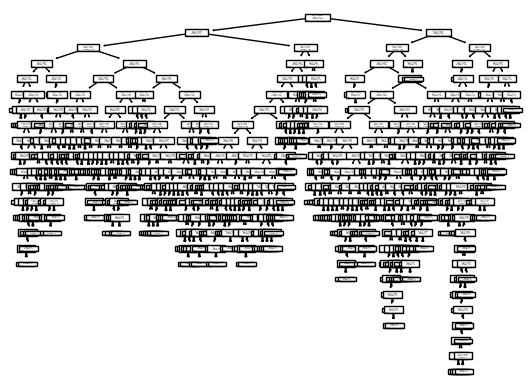

In [117]:
plot_tree(arbol)

In [118]:
predicciones = arbol.predict(X_test)

In [119]:
predicciones

array([7, 5, 5, 5, 6, 5, 5, 8, 5, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 6, 4, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 5, 6, 6,
       5, 4, 6, 6, 6, 6, 5, 6, 6, 5, 7, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 7,
       6, 5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6, 7, 7, 4, 5, 6, 4, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5, 7, 7, 5, 5, 5, 6,
       5, 8, 6, 6, 5, 7, 6, 7, 5, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 5, 5, 7, 5, 6, 7, 5, 5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5,
       5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 7, 7, 5, 5, 4, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 4, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7,
       5, 6, 6, 6, 5, 7, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 7, 5, 5, 7, 5, 6,
       5, 5, 6, 5, 7, 6, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 3, 6,
       6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 4, 6, 7, 6, 5,
       6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 6, 3, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5,
       6, 7, 5, 6, 5, 6, 6, 7, 5, 7, 5, 5, 5, 5, 5,

In [120]:
#check confusion matriz
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,0,5,3,0,0
5,2,7,105,29,3,0
6,0,2,32,76,12,2
7,0,0,6,11,18,0
8,0,1,1,1,3,0


In [121]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.621875